# Zadanie 5 — Przygotowanie danych dla modelu ML (Titanic)

## 0. Importy i ścieżki

In [15]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import textwrap

# reproducibility
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

DATA_PATH = r"C:\Users\Administrator\Desktop\Studia\Semestr 1\Nauka o Danych L\Laboratorium 3\Titanic-Dataset.csv"
TARGET_COL = "Survived"


## 1. Wczytanie danych i podstawowe informacje

In [2]:

df = pd.read_csv(DATA_PATH)
df.columns = [c.strip() for c in df.columns]
print("Kształt danych:", df.shape)
display(df.head())
print("\nInformacje:")
df.info()


Kształt danych: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



Informacje:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 1.1. Typy zmiennych i statystyki opisowe

In [3]:

types_info = pd.DataFrame({
    "column": df.columns,
    "dtype": df.dtypes.astype(str),
    "nunique": [df[c].nunique(dropna=True) for c in df.columns],
    "n_missing": [df[c].isna().sum() for c in df.columns],
})
display(types_info)

print("\nStatystyki opisowe (numeryczne):")
display(df.select_dtypes(include=[np.number]).describe().T)

print("\nStatystyki opisowe (kategoryczne):")
display(df.select_dtypes(exclude=[np.number]).describe().T)


,column,dtype,nunique,n_missing
PassengerId,PassengerId,int64,891,0
Survived,Survived,int64,2,0
Pclass,Pclass,int64,3,0
Name,Name,object,891,0
Sex,Sex,object,2,0
Age,Age,float64,88,177
SibSp,SibSp,int64,7,0
Parch,Parch,int64,7,0
Ticket,Ticket,object,681,0
Fare,Fare,float64,248,0



Statystyki opisowe (numeryczne):


,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292



Statystyki opisowe (kategoryczne):


,count,unique,top,freq
Name,891,891,"Dooley, Mr. Patrick",1
Sex,891,2,male,577
Ticket,891,681,347082,7
Cabin,204,147,G6,4
Embarked,889,3,S,644


## 1.1. Korelacje i multikolinearność (VIF)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


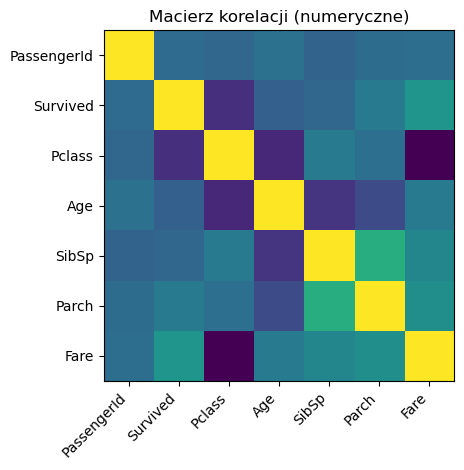

,feature,VIF
0,Pclass,1.815407
1,Fare,1.594350
2,SibSp,1.291353
3,Parch,1.271368
4,Age,1.251086
5,Survived,1.197039
6,PassengerId,1.005396


In [16]:

num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
corr = df[num_cols].corr(numeric_only=True)
display(corr)

# Wizualizacja prosta (matplotlib)
plt.figure()
plt.imshow(corr, interpolation="nearest")
plt.title("Macierz korelacji (numeryczne)")
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45, ha="right")
plt.yticks(range(len(corr.index)), corr.index)
plt.tight_layout()
plt.show()

def compute_vif_matrix(X: pd.DataFrame):
    from numpy.linalg import lstsq
    X_ = X.copy()
    X_ = X_.fillna(X_.median(numeric_only=True))
    X_ = X_.loc[:, X_.apply(lambda s: s.nunique(dropna=True) > 1)]
    vifs = {}
    for col in X_.columns:
        y = X_[col].values
        X_other = X_.drop(columns=[col]).values
        X_other = np.column_stack([np.ones(X_other.shape[0]), X_other])
        beta, _, _, _ = lstsq(X_other, y, rcond=None)
        y_hat = X_other @ beta
        ss_res = ((y - y_hat) ** 2).sum()
        ss_tot = ((y - y.mean()) ** 2).sum()
        r2 = 1 - ss_res / ss_tot if ss_tot > 0 else 0.0
        vif = 1 / (1 - r2) if (1 - r2) > 1e-9 else np.inf
        vifs[col] = vif
    return pd.Series(vifs).sort_values(ascending=False)

if len(num_cols) >= 2:
    vif_series = compute_vif_matrix(df[num_cols])
    display(pd.DataFrame({"feature": vif_series.index, "VIF": vif_series.values}))
else:
    print("Za mało cech numerycznych do oceny VIF.")


## 1.1. Relacje cech z targetem

In [5]:

if TARGET_COL in df.columns and TARGET_COL in num_cols:
    print("Korelacje z targetem:")
    display(corr[TARGET_COL].sort_values(ascending=False))
elif TARGET_COL in df.columns:
    print("Średnie cech numerycznych wg targetu:")
    display(df.groupby(TARGET_COL)[num_cols].mean(numeric_only=True).T)
else:
    print("Brak kolumny targetowej — ustaw TARGET_COL.")


Korelacje z targetem:


Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

## 1.2. Braki danych i duplikaty

,column,missing_count,missing_pct
10,Cabin,687,77.10
5,Age,177,19.87
11,Embarked,2,0.22
0,PassengerId,0,0.00
3,Name,0,0.00
2,Pclass,0,0.00
1,Survived,0,0.00
4,Sex,0,0.00
7,Parch,0,0.00
6,SibSp,0,0.00


Duplikaty: 0 wierszy (0.0%)


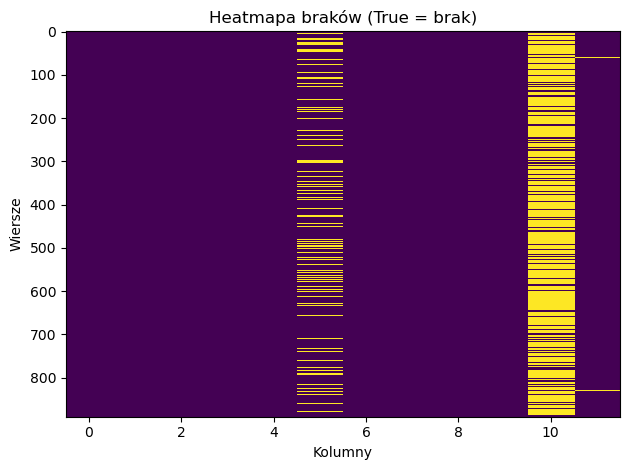

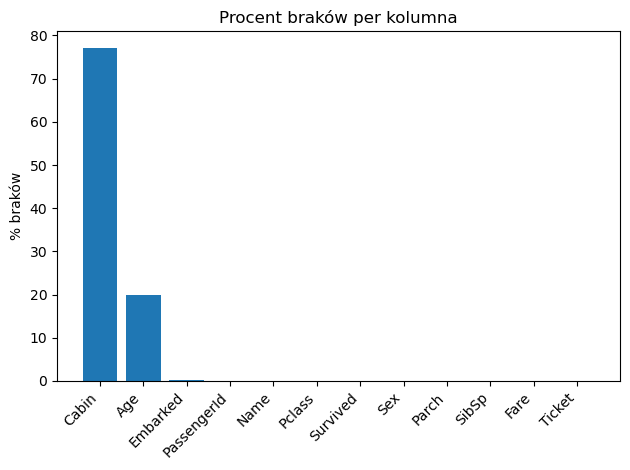

Heurystyczna klasyfikacja braków (do opisu w sprawozdaniu):
- Age: MAR (brak zależny od innych zmiennych, np. tytułu/klasy/pleci)
- Cabin: MNAR (brak informatywny; częściej brak przy tańszych biletach/niższych klasach)
- Embarked: MCAR/MAR (pojedyncze braki, brak wyraźnego wzorca)
Uwaga: brak formalnego testu Little'a w tym notatniku.



In [6]:

missing_df = pd.DataFrame({
    "column": df.columns,
    "missing_count": df.isna().sum().values,
    "missing_pct": (df.isna().mean().values * 100).round(2)
}).sort_values("missing_pct", ascending=False)
display(missing_df)

dup_count = df.duplicated().sum()
dup_pct = round(100 * dup_count / len(df), 2) if len(df) else 0.0
print(f"Duplikaty: {dup_count} wierszy ({dup_pct}%)")

plt.figure()
plt.imshow(df.isna(), aspect="auto", interpolation="nearest")
plt.title("Heatmapa braków (True = brak)")
plt.xlabel("Kolumny"); plt.ylabel("Wiersze")
plt.tight_layout(); plt.show()

plt.figure()
plt.bar(missing_df["column"], missing_df["missing_pct"])
plt.title("Procent braków per kolumna")
plt.xticks(rotation=45, ha="right"); plt.ylabel("% braków")
plt.tight_layout(); plt.show()

print(textwrap.dedent("""Heurystyczna klasyfikacja braków (do opisu w sprawozdaniu):
- Age: MAR (brak zależny od innych zmiennych, np. tytułu/klasy/pleci)
- Cabin: MNAR (brak informatywny; częściej brak przy tańszych biletach/niższych klasach)
- Embarked: MCAR/MAR (pojedyncze braki, brak wyraźnego wzorca)
Uwaga: brak formalnego testu Little'a w tym notatniku.
"""))


## 2.1. Imputacje + usuwanie kolumn z >60% braków

In [7]:

# Usunięcie kolumn z >60% braków
cols_to_drop = missing_df.loc[missing_df['missing_pct'] > 60, 'column'].tolist()
df_clean = df.drop(columns=cols_to_drop)
print("Usunięte kolumny (>60% braków):", cols_to_drop if cols_to_drop else "Brak")

# Porównanie metod imputacji dla wybranej kolumny (Age)
compare_col = "Age" if "Age" in df_clean.columns else None
if compare_col:
    s = df_clean[compare_col]
    known_idx = s.dropna().index
    if len(known_idx) > 10:
        mask_idx = np.random.choice(known_idx, size=max(1, int(0.2*len(known_idx))), replace=False)
        s_masked = s.copy()
        true_vals = s.loc[mask_idx]
        s_masked.loc[mask_idx] = np.nan
        mean_val = s_masked.mean()
        median_val = s_masked.median()
        s_mean = s_masked.fillna(mean_val)
        s_median = s_masked.fillna(median_val)
        mae_mean = np.abs(s_mean.loc[mask_idx] - true_vals).mean()
        mae_median = np.abs(s_median.loc[mask_idx] - true_vals).mean()
        print(f"Porównanie imputacji dla {compare_col}: MAE mean={mae_mean:.3f}, MAE median={mae_median:.3f}")
    else:
        print("Za mało znanych wartości, by porównać imputacje.")
else:
    print("Brak kolumny Age — pomiń porównanie imputacji.")

df_imputed = df_clean.copy()
for c in df_imputed.select_dtypes(include=[np.number]).columns:
    df_imputed[c] = df_imputed[c].fillna(df_imputed[c].median())
for c in df_imputed.select_dtypes(exclude=[np.number]).columns:
    mode_vals = df_imputed[c].mode(dropna=True)
    mode_val = mode_vals.iloc[0] if len(mode_vals) else "MISSING"
    df_imputed[c] = df_imputed[c].fillna(mode_val)

df_imputed.info()


Usunięte kolumny (>60% braków): ['Cabin']
Porównanie imputacji dla Age: MAE mean=11.003, MAE median=10.796
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


## 2.2. Outliery (IQR) — capping vs usuniecie + boxplot/scatter

C:\Users\Administrator\AppData\Local\Temp\ipykernel_20684\2586608732.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-1.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_capped.loc[mask_low, c] = low
C:\Users\Administrator\AppData\Local\Temp\ipykernel_20684\2586608732.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_capped.loc[mask_low, c] = low
C:\Users\Administrator\AppData\Local\Temp\ipykernel_20684\2586608732.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-1.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_capped.loc[mask_low, c] = low


,column,lower_cap,upper_cap,n_capped_low,n_capped_high
0,PassengerId,-444.000,1336.0000,0,0
1,Survived,-1.500,2.5000,0,0
2,Pclass,0.500,4.5000,0,0
3,Age,2.500,54.5000,24,42
4,SibSp,-1.500,2.5000,0,46
5,Parch,0.000,0.0000,0,213
6,Fare,-26.724,65.6344,0,116


C:\Users\Administrator\AppData\Local\Temp\ipykernel_20684\2586608732.py:27: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df_imputed[col], df_capped[col]], labels=["przed", "po"])


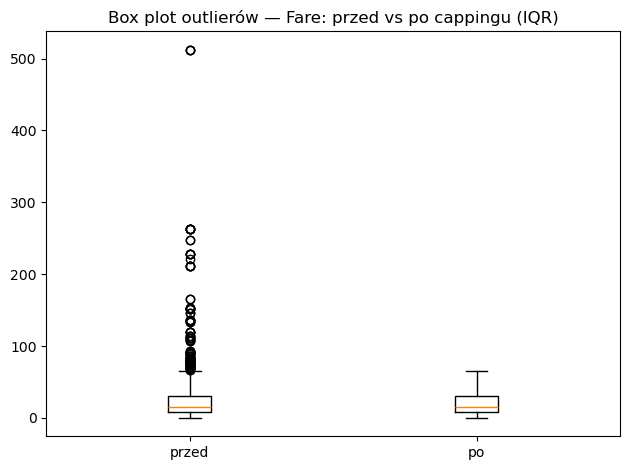

C:\Users\Administrator\AppData\Local\Temp\ipykernel_20684\2586608732.py:27: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df_imputed[col], df_capped[col]], labels=["przed", "po"])


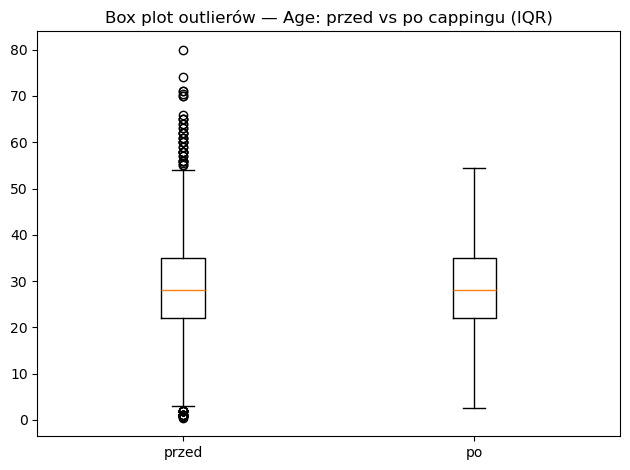

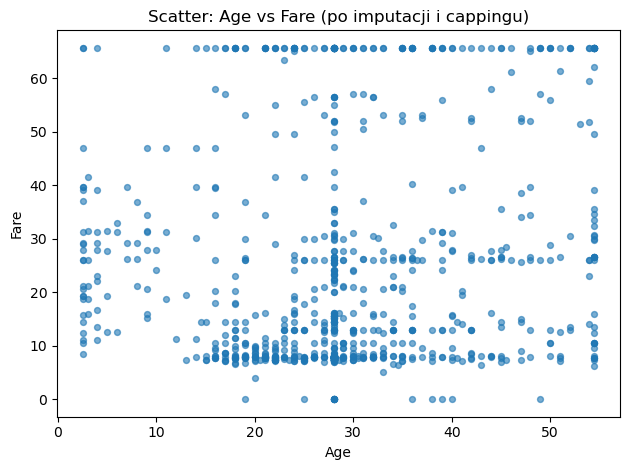

Decyzja: zastosowano capping (winsoryzację) zamiast usuwania obserwacji, aby zachować liczebność próbki.


In [8]:

def iqr_bounds(s):
    q1 = s.quantile(0.25); q3 = s.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    return lower, upper

df_capped = df_imputed.copy()
outlier_summary = []
for c in df_capped.select_dtypes(include=[np.number]).columns:
    low, up = iqr_bounds(df_capped[c])
    mask_low = df_capped[c] < low
    mask_up  = df_capped[c] > up
    n_low, n_up = mask_low.sum(), mask_up.sum()
    # decyzja: capping (winsoryzacja) by nie tracić danych
    df_capped.loc[mask_low, c] = low
    df_capped.loc[mask_up,  c] = up
    outlier_summary.append({"column": c, "lower_cap": float(low), "upper_cap": float(up),
                            "n_capped_low": int(n_low), "n_capped_high": int(n_up)})
outlier_summary = pd.DataFrame(outlier_summary)
display(outlier_summary)

for col in ["Fare", "Age"]:
    if col in df_imputed.columns:
        plt.figure()
        plt.boxplot([df_imputed[col], df_capped[col]], labels=["przed", "po"])
        plt.title(f"Box plot outlierów — {col}: przed vs po cappingu (IQR)")
        plt.tight_layout(); plt.show()

if set(["Age","Fare"]).issubset(df_capped.columns):
    plt.figure()
    plt.scatter(df_capped["Age"], df_capped["Fare"], alpha=0.6, s=18)
    plt.xlabel("Age"); plt.ylabel("Fare"); plt.title("Scatter: Age vs Fare (po imputacji i cappingu)")
    plt.tight_layout(); plt.show()

print("Decyzja: zastosowano capping (winsoryzację) zamiast usuwania obserwacji, aby zachować liczebność próbki.")


## 2.3. Feature Engineering — nowe kolumny

In [9]:

df_feat = df_capped.copy()

if set(["SibSp","Parch"]).issubset(df_feat.columns):
    df_feat["FamilySize"] = df_feat["SibSp"] + df_feat["Parch"] + 1

if set(["Fare","FamilySize"]).issubset(df_feat.columns):
    df_feat["FarePerPerson"] = df_feat["Fare"] / df_feat["FamilySize"]

if "Name" in df_feat.columns:
    df_feat["Title"] = df_feat["Name"].str.extract(r",\s*([^\.]+)\.", expand=False).str.strip()

if "Age" in df_feat.columns:
    df_feat["AgeBin"] = pd.cut(df_feat["Age"], bins=[0,12,18,35,60,np.inf],
                               labels=["Child","Teen","YoungAdult","Adult","Senior"], include_lowest=True)

print(df_feat[["FamilySize","FarePerPerson","Title","AgeBin"]].head())


   FamilySize  FarePerPerson Title      AgeBin
0         2.0         3.6250    Mr  YoungAdult
1         2.0        32.8172   Mrs       Adult
2         1.0         7.9250  Miss  YoungAdult
3         2.0        26.5500   Mrs  YoungAdult
4         1.0         8.0500    Mr  YoungAdult


### Korelacje nowych cech z targetem

In [11]:
df_feat[TARGET_COL] = pd.to_numeric(df_feat[TARGET_COL], errors="coerce")

if TARGET_COL in df_feat.columns:
    if TARGET_COL in df_feat.select_dtypes(include=[np.number]).columns:
        for new_c in ["FamilySize", "FarePerPerson"]:
            if new_c in df_feat.columns and pd.api.types.is_numeric_dtype(df_feat[new_c]):
                corr_val = df_feat[[TARGET_COL, new_c]].corr().iloc[0, 1]
                print(f"Korelacja {new_c} ↔ {TARGET_COL}: {corr_val:.3f}")

    for cat_c in ["Title", "AgeBin"]:
        if cat_c in df_feat.columns:
            try:
                means = df_feat.groupby(cat_c, dropna=True)[TARGET_COL].mean()
                print(f"Średni {TARGET_COL} wg {cat_c}:\n{means}\n")
            except Exception as e:
                print(f"Pominięto {cat_c} (powód: {e})")


Korelacja FamilySize ↔ Survived: 0.031
Korelacja FarePerPerson ↔ Survived: 0.308
Średni Survived wg Title:
Title
Capt            0.000000
Col             0.500000
Don             0.000000
Dr              0.428571
Jonkheer        0.000000
Lady            1.000000
Major           0.500000
Master          0.575000
Miss            0.697802
Mlle            1.000000
Mme             1.000000
Mr              0.156673
Mrs             0.792000
Ms              1.000000
Rev             0.000000
Sir             1.000000
the Countess    1.000000
Name: Survived, dtype: float64

Średni Survived wg AgeBin:
AgeBin
Child         0.579710
Teen          0.428571
YoungAdult    0.353271
Adult         0.382488
Senior             NaN
Name: Survived, dtype: float64



C:\Users\Administrator\AppData\Local\Temp\ipykernel_20684\3868606490.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means = df_feat.groupby(cat_c, dropna=True)[TARGET_COL].mean()


## 3.1. Walidacja: duplikaty, zakresy, normalność, spójność

Duplikaty: przed=0, po=0
Problemy zakresów: Brak rażących problemów.
Shapiro Age: stat=0.9549, p=0.0000


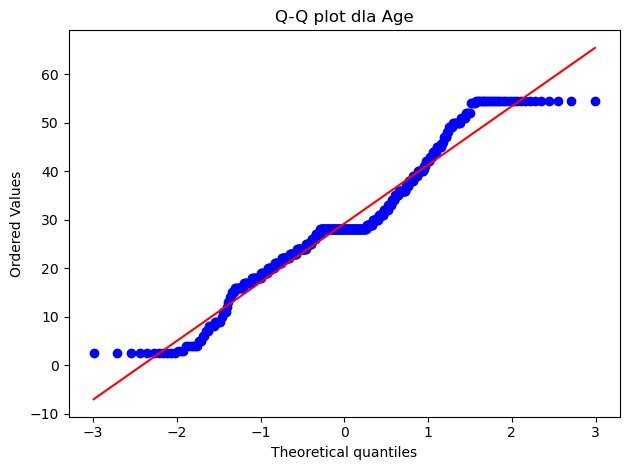

Shapiro Fare: stat=0.7957, p=0.0000


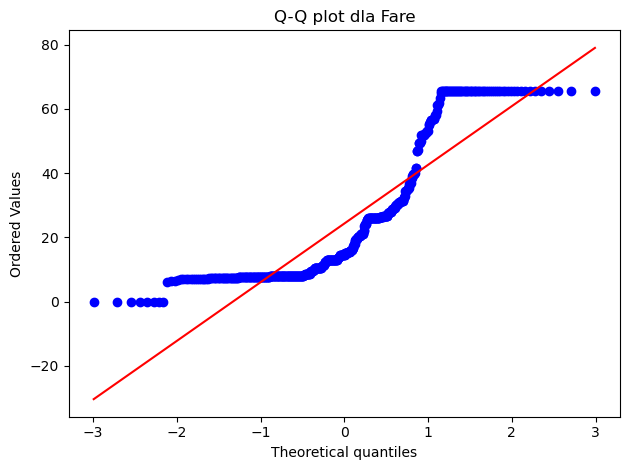

Niezgodności (>|0.5|): 0


In [12]:

dup_before = df_feat.duplicated().sum()
df_valid = df_feat.drop_duplicates()
dup_after = df_valid.duplicated().sum()
print(f"Duplikaty: przed={dup_before}, po={dup_after}")

issues = []
if "Age" in df_valid.columns:
    n_bad = (~df_valid["Age"].between(0, 100, inclusive="both")).sum()
    if n_bad: issues.append(f"Age poza [0,100]: {n_bad}")
if "Fare" in df_valid.columns:
    n_bad = (df_valid["Fare"] < 0).sum()
    if n_bad: issues.append(f"Ujemne Fare: {n_bad}")
print("Problemy zakresów:", "; ".join(issues) if issues else "Brak rażących problemów.")

try:
    from scipy.stats import shapiro, probplot
    for c in ["Age","Fare"]:
        if c in df_valid.columns:
            sample = df_valid[c].dropna()
            sample = sample.sample(min(500, len(sample)), random_state=RANDOM_SEED) if len(sample)>500 else sample
            stat, p = shapiro(sample)
            print(f"Shapiro {c}: stat={stat:.4f}, p={p:.4f}")
            plt.figure()
            probplot(sample, dist="norm", plot=plt)
            plt.title(f"Q-Q plot dla {c}")
            plt.tight_layout(); plt.show()
except Exception as e:
    print("Pominięto test normalności (brak SciPy lub inny problem):", e)

if set(["FarePerPerson","FamilySize","Fare"]).issubset(df_valid.columns):
    approx_fare = (df_valid["FarePerPerson"] * df_valid["FamilySize"]).round(2)
    diff = (approx_fare - df_valid["Fare"]).abs()
    print("Niezgodności (>|0.5|):", int((diff > 0.5).sum()))


## 3.2. Wizualizacje 

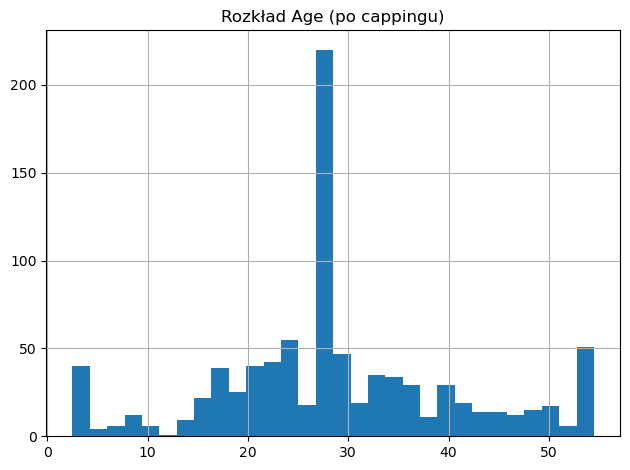

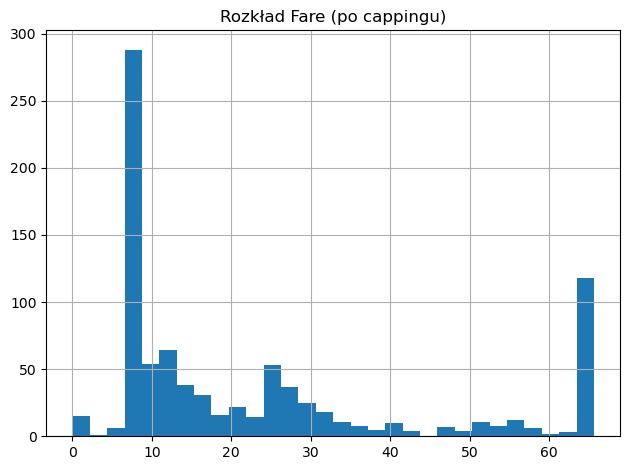

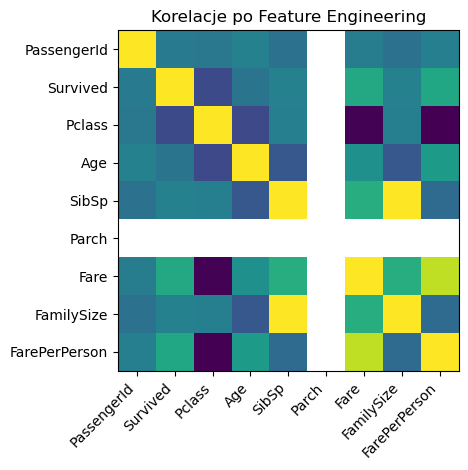

<Figure size 640x480 with 0 Axes>

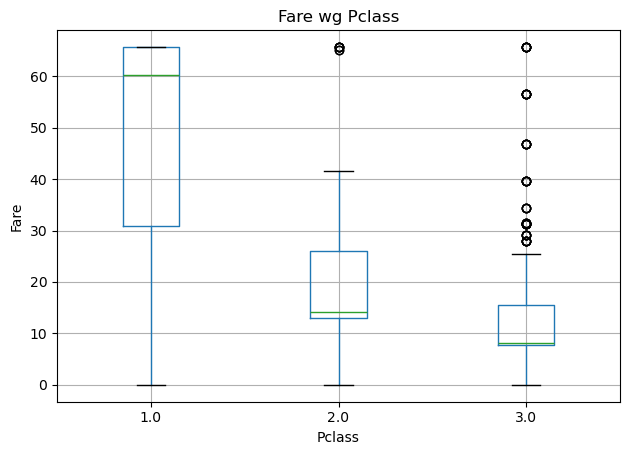

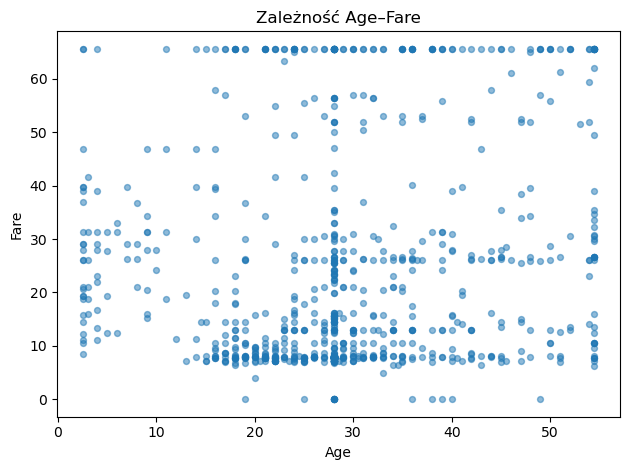

In [13]:

# Histogramy (po cappingu)
for c in ["Age","Fare"]:
    if c in df_valid.columns:
        plt.figure()
        df_valid[c].hist(bins=30)
        plt.title(f"Rozkład {c} (po cappingu)")
        plt.tight_layout(); plt.show()

# Heatmapa korelacji po FE
corr_after = df_valid.select_dtypes(include=[np.number]).corr(numeric_only=True)
plt.figure()
plt.imshow(corr_after, interpolation="nearest")
plt.title("Korelacje po Feature Engineering")
plt.xticks(range(len(corr_after.columns)), corr_after.columns, rotation=45, ha="right")
plt.yticks(range(len(corr_after.index)), corr_after.index)
plt.tight_layout(); plt.show()

# Boxplot wg klasy pasażerskiej
if set(["Pclass","Fare"]).issubset(df_valid.columns):
    plt.figure()
    # prosty boxplot z pandas
    df_valid[["Pclass","Fare"]].boxplot(by="Pclass")
    plt.suptitle("")
    plt.title("Fare wg Pclass")
    plt.xlabel("Pclass"); plt.ylabel("Fare")
    plt.tight_layout(); plt.show()

# Scatter: Age vs Fare
if set(["Age","Fare"]).issubset(df_valid.columns):
    plt.figure()
    plt.scatter(df_valid["Age"], df_valid["Fare"], alpha=0.5, s=18)
    plt.xlabel("Age"); plt.ylabel("Fare")
    plt.title("Zależność Age–Fare")
    plt.tight_layout(); plt.show()


## 4. Zapis oczyszczonego zbioru

In [14]:

OUTPUT_PATH = "titanic_processed.csv"
df_valid.to_csv(OUTPUT_PATH, index=False)
print("Zapisano do:", OUTPUT_PATH)


Zapisano do: titanic_processed.csv
